In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('trusted/combined.csv')

In [4]:
df['Data'] = pd.to_datetime(df['Data'])

In [5]:
def show_info(series: pd.Series):
	print(series.describe())
	print(series.value_counts())
	print(series.isnull().sum())

In [6]:
df.dtypes

DiaSemana                              int64
CompanhiaResponsavel                  object
NumeroAeronave                        object
TempoTotal                           float64
TempoTotalPrevisto                   float64
TempoVoando                          float64
AtrasoChegada                        float64
AtrasoPartida                        float64
AeroportoOrigem                       object
AeroportoDestino                      object
Distancia                            float64
TaxiIn                               float64
TaxiOut                              float64
DesviouRota                            int64
AtrasoCompanhia                      float64
AtrasoClimaTempo                     float64
AtrasoSistemaAereo                   float64
AtrasoSeguranca                      float64
AtrasoAeronave                       float64
Data                          datetime64[ns]
HoraPartida                           object
HoraPartidaMinutos                     int64
HoraPartid

In [7]:
print(df.head())

   DiaSemana CompanhiaResponsavel NumeroAeronave  TempoTotal  \
0          6                   PI            NaN        23.0   
1          4                   HP            NaN        88.0   
2          4                   PI            NaN        84.0   
3          1                   DL            NaN       116.0   
4          3                   AA            NaN        85.0   

   TempoTotalPrevisto  TempoVoando  AtrasoChegada  AtrasoPartida  \
0                28.0          NaN           12.0           17.0   
1                65.0          NaN           28.0            5.0   
2                69.0          NaN           17.0            2.0   
3               105.0          NaN           24.0           13.0   
4                86.0          NaN            7.0            8.0   

  AeroportoOrigem AeroportoDestino  ...  AtrasoAeronave       Data  \
0             MIA              FLL  ...             0.0 1987-11-28   
1             LAX              PHX  ...             0.0 1987-10-22

In [8]:
df.columns

Index(['DiaSemana', 'CompanhiaResponsavel', 'NumeroAeronave', 'TempoTotal',
       'TempoTotalPrevisto', 'TempoVoando', 'AtrasoChegada', 'AtrasoPartida',
       'AeroportoOrigem', 'AeroportoDestino', 'Distancia', 'TaxiIn', 'TaxiOut',
       'DesviouRota', 'AtrasoCompanhia', 'AtrasoClimaTempo',
       'AtrasoSistemaAereo', 'AtrasoSeguranca', 'AtrasoAeronave', 'Data',
       'HoraPartida', 'HoraPartidaMinutos', 'HoraPartidaPrevista',
       'HoraPartidaPrevistaMinutos', 'HoraChegada', 'HoraChegadaMinutos',
       'HoraChegadaPrevista', 'HoraChegadaPrevistaMinutos'],
      dtype='object')

In [39]:
valores_nao_nulos = df.dropna(subset=['AtrasoPartida', 'AtrasoChegada'])
valores_nao_nulos['AtrasoTotal'] = valores_nao_nulos['AtrasoPartida'] + valores_nao_nulos['AtrasoChegada']

valores_nao_nulos.groupby('CompanhiaResponsavel')['AtrasoTotal'].agg(['mean', 'count']).sort_values(by='mean', ascending=True)

,mean,count
CompanhiaResponsavel,,
AQ,13.187500,16
PI,25.666667,354
HA,30.380952,21
DL,35.481625,3619
US,36.405970,3015
F9,39.232558,43
HP,40.251645,608
AA,41.992751,2621
WN,42.872364,2703


<Axes: title={'center': 'Porcentagem de atrasos por motivo'}>

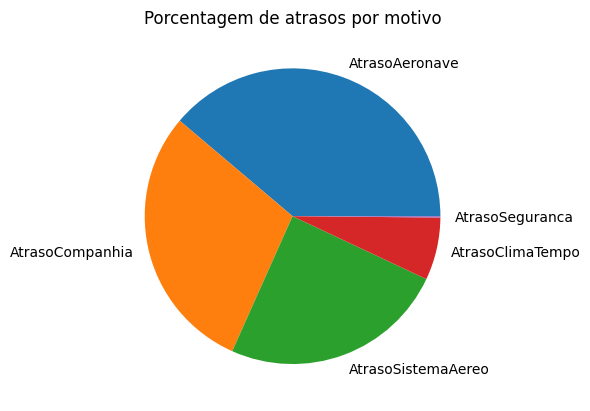

In [36]:
atrasos = ['AtrasoCompanhia', 'AtrasoClimaTempo', 'AtrasoSistemaAereo', 'AtrasoSeguranca', 'AtrasoAeronave']
valores_nao_nulos = df.dropna(subset=atrasos)
prct_atrasos = valores_nao_nulos[atrasos].mean() / valores_nao_nulos[atrasos].mean().sum() * 100

prct_atrasos.sort_values(ascending=False).plot(kind='pie', title='Porcentagem de atrasos por motivo')

## Análise de negligência

<Axes: xlabel='Ano'>

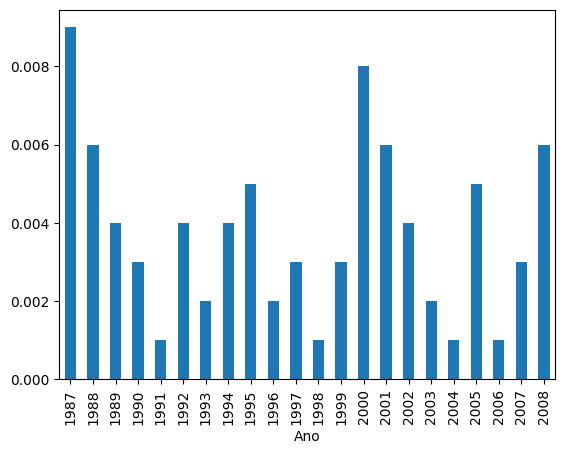

In [19]:
df['Ano'] = df['Data'].dt.year
df.groupby('Ano')['DesviouRota'].mean().plot(kind='bar')

<Axes: xlabel='Ano'>

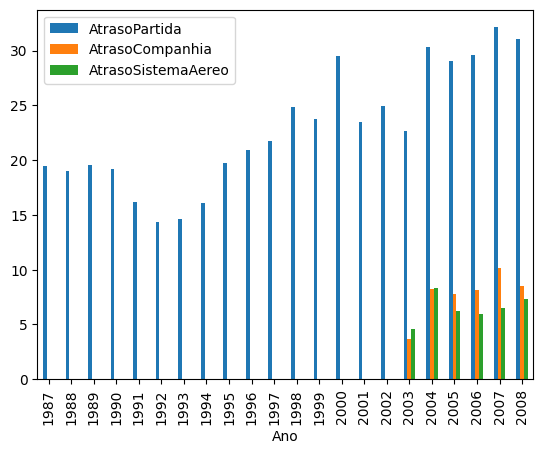

In [20]:
df['Ano'] = df['Data'].dt.year
atrasos = ['AtrasoPartida', 'AtrasoCompanhia', 'AtrasoSistemaAereo']
df.groupby('Ano')[atrasos].mean().plot(kind='bar')